In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('aug.csv')
df = df[['class','text']]

In [ ]:
np.savetxt('test_short_aug.txt', df.values,fmt='%s')

In [ ]:
df

In [ ]:
from tqdm import tqdm
import numpy as np
embedding_vector = {}
f = open('eda_code/glove.840B.300d.txt')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef
f.close()
    

In [ ]:
for count,(key,value) in enumerate(embedding_vector.items()):
    while count <1 :
        print(key,value)

In [ ]:
def load_data(path):
    """
    Loads data from a txt file.
    """
    # check file format
    if path.endswith('.txt'):
        df = pd.read_csv(path, sep='|', header=None, names=['text'])
        try:
            df['class'] = df['text'].apply(lambda x: x.split('\t')[0])
            df['text'] = df['text'].apply(lambda x: x.split('\t')[1])
        except:
            df['class'] = df['text'].apply(lambda x: x.split(' ',1)[0])
            df['text'] = df['text'].apply(lambda x: x.split(' ',1)[1])

        df = df[['class', 'text']]
        return df
    else:
        raise ValueError('File format not supported.')

In [ ]:
def func(text_list,word2vec_file):
    for word in text_list:
        if word in word2vec_file:
            return np.asarray(word2vec_file[word])
        else:
            return np.zeros(300,dtype='float32')

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import pickle



train_txt = 'txt_for_test/train.txt'
test_txt = 'txt_for_test/test.txt'
percent_dataset = 1
word2vec_len = 300
input_size = 25
num_classes = 2
word2vec_file = pickle.load(open('/home/peyman/nlp_da_comparison/codes/cr/word2vec.p', 'rb'))



file_path = train_txt
df = load_data(file_path)
df = df.sample(frac=percent_dataset)
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = [word_tokenize(i) for i in df['text']]
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])
#filt = lambda x: [np.asarray(word2vec_file[x]) for x in x if x in word2vec_file ] 
df['text'] = df['text'].apply(func,word2vec_file=word2vec_file)
#df['text'] = df['text'].apply(lambda x: np.asarray(x, dtype=float))
num_lines = len(df)

x_matrix = None
y_matrix = None

try:
    x_matrix = np.zeros((num_lines, input_size, word2vec_len))
except:
    print("Error!", num_lines, input_size, word2vec_len)
y_matrix = np.zeros((num_lines, num_classes))



In [ ]:
count = 0
for i in range(len(df)):
    if len(df['text'][i]) > input_size:
        #x_matrix[i] = df['text'][i][:input_size]
        print(df['text'][i])
        count += 1
print(count)

In [ ]:
print(len(df.iloc[1]['text'][0]))
print(df.iloc[1]['text'])

In [ ]:
x_matrix.shape

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np
def gen_vocab_for_dataset(folder_path):
    path = folder_path
    
    df = load_data(file_path)
    raw_text = list(df['text'])
    # bulid the vocab
    vocab = set()
    word2vec = {}
#todo : define the matrix

In [ ]:
new_df = df.values
# df['text'] = [df['text'][i] for i if len(df['text'][i]) >= input_size]

In [ ]:
for i , row in enumerate(df['text']):
    if len(row) < input_size:
        new_df[i][1] = None

In [ ]:
len(new_df[0][1])

In [ ]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer

def try_stem(word):
    ps = PorterStemmer()
    ls = LancasterStemmer()
    wn = WordNetLemmatizer()
    if ps.stem(word) in embedding_vector:
        return ps.stem(word)
    elif ls.stem(word) in embedding_vector:
        return ls.stem(word)
    elif wn.lemmatize(word) in embedding_vector:
        return wn.lemmatize(word)
    else:
        return np.zeros(300)

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
import numpy as np


ps = LancasterStemmer()
path = 'txt_for_test'
test_file_path = path + '/test.txt'
train_file_path = path + '/train.txt'
df_train = load_data(train_file_path)
df_test = load_data(test_file_path)
raw_text = list(df_train['text'].apply(lambda x: x.lower())) + list(df_test['text'].apply(lambda x: x.lower()))
# bulid the vocab
vocab = set()
word2vec = {}

for text in raw_text:
    for word in word_tokenize(text):
        vocab.add(word)
        if word not in word2vec:
            try:
                word2vec[word] = np.asarray(embedding_vector[word], dtype = 'float32')
            except:
                word2vec[word] = try_stem(word)
        else:
            pass












# for text in raw_text:
#     for word in word_tokenize(text):
#         vocab.add(word)
#         if word not in word2vec:
#             try:
#                 word2vec[word] = np.asarray(embedding_vector[word], dtype = 'float32')
#             except Exception as e:
#                 try:
#                     word = ps.stem(word)
#                     word2vec[word] = np.asarray(embedding_vector[word], dtype = 'float32')
#                 except Exception as e:
#                     word2vec[word] = np.zeros(300)
#         else:
#             pass

In [ ]:
print(len(word2vec))
print(len(vocab))

In [ ]:
#ps.stem('pluger')
from nltk.stem import WordNetLemmatizer, LancasterStemmer, PorterStemmer
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
#lemmatizer.lemmatize('malasyia')
#stemmer.stem('pluger')
ps.stem('malasyia')

In [ ]:
embedding_vector['plug'].shape

In [ ]:
text_embeddings = open('eda_code/glove.840B.300d.txt', 'r').readlines()

In [ ]:
vocab = 'the pluger gets stuck & you have to manually extract the mess.'.split()
import numpy as np
for line in text_embeddings:
        items = line.split(' ')
        word = items[0]
        if word in vocab:
            vec = items[1:]
            word2vec[word] = np.asarray(vec, dtype = 'float32')
print(len(word2vec), "matches between unique words and word2vec dictionary")

In [ ]:
word2vec.keys()

In [ ]:


vocab = set()
text_embeddings = open('eda_code/glove.840B.300d.txt', 'r').readlines()
word2vec = {}



# get all the words
try:
    
    for line in raw_text:
        words = line[:-1].split(' ')
        for word in words:
            vocab.add(word)
except:
    print(line,"has an error")

print(len(vocab), "unique words found")

# load the word embeddings, and only add the word to the dictionary if we need it
for line in text_embeddings:
    items = line.split(' ')
    word = items[0]
    if word in vocab:
        vec = items[1:]
        word2vec[word] = np.asarray(vec, dtype = 'float32')
print(len(word2vec), "matches between unique words and word2vec dictionary")

In [ ]:
word2vec.keys()

In [ ]:
import os
type(os.getcwd())

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional
import keras.layers as layers
from keras.models import Sequential
import os
from random import shuffle
import numpy as np
import tqdm
import pickle
import snoop
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #get rid of warnings


#building the model in keras
def build_model(sentence_length, word2vec_len, num_classes):
    model = None
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(sentence_length, word2vec_len)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32, return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #print(model.summary())
    return model

In [ ]:
train_txt = 'txt_for_test/train.txt'
test_txt = 'txt_for_test/test.txt'
percent_dataset = 1
word2vec_len = 300
input_size = 25
num_classes = 2
word2vec_file = pickle.load(open('/home/peyman/nlp_da_comparison/codes/cr/word2vec.p', 'rb'))



In [ ]:

def get_x_y_matrix(input_raw, num_classes, word2vec_len, input_size, word2vec_file,percentage):
    input_lines = open(input_raw, 'r').readlines()
    shuffle(input_lines)
    input_lines = input_lines[:int(percentage*len(input_lines))]
    num_lines = len(input_lines)

    #initialize x and y matrix
    x_matrix = None
    y_matrix = None

    try:
        x_matrix = np.zeros((num_lines, input_size, word2vec_len))
    except:
        print("Error!", num_lines, input_size, word2vec_len)
    y_matrix = np.zeros((num_lines, num_classes))


    #insert values
    for i, line in enumerate(input_lines):
        #print(line)
        try:
            parts = line[:-1].split('\t')
            label = int(parts[0])
            sentence = parts[1]
        except Exception as e:
            parts = line[:-1].split(' ',1)
            label = int(parts[0])
            sentence = parts[1]        	

        #insert x
        words = sentence.split(' ')
        words = words[:x_matrix.shape[1]] #cut off if too long
        for j, word in enumerate(words):
            if word in word2vec_file:
                x_matrix[i, j, :] = word2vec_file[word]

        #insert y
        y_matrix[i][label] = 1.0

    return x_matrix, y_matrix

In [ ]:
train_x, train_y = get_x_y_matrix(train_txt, num_classes, word2vec_len, input_size, word2vec_file,percent_dataset)
test_x, test_y = get_x_y_matrix(test_txt, num_classes, word2vec_len, input_size, word2vec_file,percent_dataset)

In [ ]:
# Easy data augmentation techniques for text classification
# Jason Wei, Chengyu Huang, Yifang Wei, Fei Xing, Kai Zou

import random
from random import shuffle
random.seed(1)

#stop words list
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 
			'ours', 'ourselves', 'you', 'your', 'yours', 
			'yourself', 'yourselves', 'he', 'him', 'his', 
			'himself', 'she', 'her', 'hers', 'herself', 
			'it', 'its', 'itself', 'they', 'them', 'their', 
			'theirs', 'themselves', 'what', 'which', 'who', 
			'whom', 'this', 'that', 'these', 'those', 'am', 
			'is', 'are', 'was', 'were', 'be', 'been', 'being', 
			'have', 'has', 'had', 'having', 'do', 'does', 'did',
			'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
			'because', 'as', 'until', 'while', 'of', 'at', 
			'by', 'for', 'with', 'about', 'against', 'between',
			'into', 'through', 'during', 'before', 'after', 
			'above', 'below', 'to', 'from', 'up', 'down', 'in',
			'out', 'on', 'off', 'over', 'under', 'again', 
			'further', 'then', 'once', 'here', 'there', 'when', 
			'where', 'why', 'how', 'all', 'any', 'both', 'each', 
			'few', 'more', 'most', 'other', 'some', 'such', 'no', 
			'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 
			'very', 's', 't', 'can', 'will', 'just', 'don', 
			'should', 'now', '']

#cleaning up text
import re
def get_only_chars(line):

    clean_line = ""

    line = line.replace("’", "")
    line = line.replace("'", "")
    line = line.replace("-", " ") #replace hyphens with spaces
    line = line.replace("\t", " ")
    line = line.replace("\n", " ")
    line = line.lower()

    for char in line:
        if char in 'qwertyuiopasdfghjklzxcvbnm ':
            clean_line += char
        else:
            clean_line += ' '

    clean_line = re.sub(' +',' ',clean_line) #delete extra spaces
    if clean_line[0] == ' ':
        clean_line = clean_line[1:]
    return clean_line

########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################

#for the first time you use wordnet
#import nltk
#nltk.download('wordnet')
from nltk.corpus import wordnet 

def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words if word not in stop_words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			#print("replaced", random_word, "with", synonym)
			num_replaced += 1
		if num_replaced >= n: #only replace up to n words
			break

	#this is stupid but we need it, trust me
	sentence = ' '.join(new_words)
	new_words = sentence.split(' ')

	return new_words

def get_synonyms(word):
	synonyms = set()
	for syn in wordnet.synsets(word): 
		for l in syn.lemmas(): 
			synonym = l.name().replace("_", " ").replace("-", " ").lower()
			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
			synonyms.add(synonym) 
	if word in synonyms:
		synonyms.remove(word)
	return list(synonyms)

########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################

def random_deletion(words, p):

	#obviously, if there's only one word, don't delete it
	if len(words) == 1:
		return words

	#randomly delete words with probability p
	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	#if you end up deleting all words, just return a random word
	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################

def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)
	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0
	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words
	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
	return new_words

########################################################################
# Random addition
# Randomly add n words into the sentence
########################################################################

def random_addition(words, n):
	new_words = words.copy()
	for _ in range(n):
		add_word(new_words)
	return new_words

def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		random_word = new_words[random.randint(0, len(new_words)-1)]
		synonyms = get_synonyms(random_word)
		counter += 1
		if counter >= 10:
			return
	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)

########################################################################
# main data augmentation function
########################################################################

def eda_4(sentence, alpha_sr=0.3, alpha_ri=0.2, alpha_rs=0.1, p_rd=0.15, num_aug=9):
	
	sentence = get_only_chars(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not '']
	num_words = len(words)
	
	augmented_sentences = []
	num_new_per_technique = int(num_aug/4)+1
	n_sr = max(1, int(alpha_sr*num_words))
	n_ri = max(1, int(alpha_ri*num_words))
	n_rs = max(1, int(alpha_rs*num_words))

	#sr
	for _ in range(num_new_per_technique):
		a_words = synonym_replacement(words, n_sr)
		augmented_sentences.append(' '.join(a_words))

	#ri
	for _ in range(num_new_per_technique):
		a_words = random_addition(words, n_ri)
		augmented_sentences.append(' '.join(a_words))

	#rs
	for _ in range(num_new_per_technique):
		a_words = random_swap(words, n_rs)
		augmented_sentences.append(' '.join(a_words))

	#rd
	for _ in range(num_new_per_technique):
		a_words = random_deletion(words, p_rd)
		augmented_sentences.append(' '.join(a_words))

	augmented_sentences = [get_only_chars(sentence) for sentence in augmented_sentences]
	shuffle(augmented_sentences)

	#trim so that we have the desired number of augmented sentences
	if num_aug >= 1:
		augmented_sentences = augmented_sentences[:num_aug]
	else:
		keep_prob = num_aug / len(augmented_sentences)
		augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

	#append the original sentence
	augmented_sentences.append(sentence)

	return augmented_sentences

def SR(sentence, alpha_sr, n_aug=9):

	sentence = get_only_chars(sentence)
	words = sentence.split(' ')
	num_words = len(words)

	augmented_sentences = []
	n_sr = max(1, int(alpha_sr*num_words))

	for _ in range(n_aug):
		a_words = synonym_replacement(words, n_sr)
		augmented_sentences.append(' '.join(a_words))

	augmented_sentences = [get_only_chars(sentence) for sentence in augmented_sentences]
	shuffle(augmented_sentences)

	augmented_sentences.append(sentence)

	return augmented_sentences

def RI(sentence, alpha_ri, n_aug=9):

	sentence = get_only_chars(sentence)
	words = sentence.split(' ')
	num_words = len(words)

	augmented_sentences = []
	n_ri = max(1, int(alpha_ri*num_words))

	for _ in range(n_aug):
		a_words = random_addition(words, n_ri)
		augmented_sentences.append(' '.join(a_words))

	augmented_sentences = [get_only_chars(sentence) for sentence in augmented_sentences]
	shuffle(augmented_sentences)

	augmented_sentences.append(sentence)

	return augmented_sentences

def RS(sentence, alpha_rs, n_aug=9):

	sentence = get_only_chars(sentence)
	words = sentence.split(' ')
	num_words = len(words)

	augmented_sentences = []
	n_rs = max(1, int(alpha_rs*num_words))

	for _ in range(n_aug):
		a_words = random_swap(words, n_rs)
		augmented_sentences.append(' '.join(a_words))

	augmented_sentences = [get_only_chars(sentence) for sentence in augmented_sentences]
	shuffle(augmented_sentences)

	augmented_sentences.append(sentence)

	return augmented_sentences

def RD(sentence, alpha_rd, n_aug=9):

	sentence = get_only_chars(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not '']
	num_words = len(words)

	augmented_sentences = []

	for _ in range(n_aug):
		a_words = random_deletion(words, alpha_rd)
		augmented_sentences.append(' '.join(a_words))

	augmented_sentences = [get_only_chars(sentence) for sentence in augmented_sentences]
	shuffle(augmented_sentences)

	augmented_sentences.append(sentence)

	return augmented_sentences




















########################################################################
# Testing
########################################################################

if __name__ == '__main__':

	line = 'Hi. My name is Jason. I’m a third-year computer science major at Dartmouth College, interested in deep learning and computer vision. My advisor is Saeed Hassanpour. I’m currently working on deep learning for lung cancer classification.'



########################################################################
# Sliding window
# Slide a window of size w over the sentence with stride s
# Returns a list of lists of words
########################################################################

# def sliding_window_sentences(words, w, s):
# 	windows = []
# 	for i in range(0, len(words)-w+1, s):
# 		window = words[i:i+w]
# 		windows.append(window)
# 	return windows






In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional
import keras.layers as layers
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import math
import time
import numpy as np
import random
from random import randint
random.seed(3)
import datetime, re, operator
from random import shuffle
from time import gmtime, strftime
import gc

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #get rid of warnings
from os import listdir
from os.path import isfile, join, isdir
import pickle

#import data augmentation methods


###################################################
######### loading folders and txt files ###########
###################################################

#loading a pickle file
def load_pickle(file):
    return pickle.load(open(file, 'rb'))

#create an output folder if it does not already exist
def confirm_output_folder(output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

#get full image paths
def get_txt_paths(folder):
    txt_paths = [join(folder, f) for f in listdir(folder) if isfile(join(folder, f)) and '.txt' in f]
    if join(folder, '.DS_Store') in txt_paths:
        txt_paths.remove(join(folder, '.DS_Store'))
    txt_paths = sorted(txt_paths)
    return txt_paths

#get subfolders
def get_subfolder_paths(folder):
    subfolder_paths = [join(folder, f) for f in listdir(folder) if (isdir(join(folder, f)) and '.DS_Store' not in f)]
    if join(folder, '.DS_Store') in subfolder_paths:
        subfolder_paths.remove(join(folder, '.DS_Store'))
    subfolder_paths = sorted(subfolder_paths)
    return subfolder_paths

#get all image paths
def get_all_txt_paths(master_folder):

    all_paths = []
    subfolders = get_subfolder_paths(master_folder)
    if len(subfolders) > 1:
        for subfolder in subfolders:
            all_paths += get_txt_paths(subfolder)
    else:
        all_paths = get_txt_paths(master_folder)
    return all_paths

###################################################
################ data processing ##################
###################################################

#get the pickle file for the word2vec so you don't have to load the entire huge file each time
def gen_vocab_dicts(folder, output_pickle_path, huge_word2vec):

    vocab = set()
    text_embeddings = open(huge_word2vec, 'r').readlines()
    word2vec = {}

    #get all the vocab
    all_txt_paths = get_all_txt_paths(folder)
    print(all_txt_paths)

    #loop through each text file
    for txt_path in all_txt_paths:

        # get all the words
        try:
            all_lines = open(txt_path, "r").readlines()
            for line in all_lines:
                words = line[:-1].split(' ')
                for word in words:
                    vocab.add(word)
        except:
            print(txt_path, "has an error")
    
    print(len(vocab), "unique words found")

    # load the word embeddings, and only add the word to the dictionary if we need it
    for line in text_embeddings:
        items = line.split(' ')
        word = items[0]
        if word in vocab:
            vec = items[1:]
            word2vec[word] = np.asarray(vec, dtype = 'float32')
    print(len(word2vec), "matches between unique words and word2vec dictionary")
        
    pickle.dump(word2vec, open(output_pickle_path, 'wb'))
    print("dictionaries outputted to", output_pickle_path)

#getting the x and y inputs in numpy array form from the text file
def get_x_y(train_txt, num_classes, word2vec_len, input_size, word2vec, percent_dataset):

    #read in lines
    train_lines = open(train_txt, 'r').readlines()
    shuffle(train_lines)
    train_lines = train_lines[:int(percent_dataset*len(train_lines))]
    num_lines = len(train_lines)

    #initialize x and y matrix
    x_matrix = None
    y_matrix = None

    try:
        x_matrix = np.zeros((num_lines, input_size, word2vec_len))
    except:
        print("Error!", num_lines, input_size, word2vec_len)
    y_matrix = np.zeros((num_lines, num_classes))

    #insert values
    for i, line in enumerate(train_lines):

        parts = line[:-1].split('\t')
        label = int(parts[0])
        sentence = parts[1]	

        #insert x
        words = sentence.split(' ')
        words = words[:x_matrix.shape[1]] #cut off if too long
        for j, word in enumerate(words):
            if word in word2vec:
                x_matrix[i, j, :] = word2vec[word]

        #insert y
        y_matrix[i][label] = 1.0

    return x_matrix, y_matrix

###################################################
############### data augmentation #################
###################################################

def gen_tsne_aug(train_orig, output_file):

    writer = open(output_file, 'w')
    lines = open(train_orig, 'r').readlines()
    for i, line in enumerate(lines):
        parts = line[:-1].split('\t')
        label = parts[0]
        sentence = parts[1]
        writer.write(line)
        for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
            aug_sentence = eda_4(sentence, alpha_sr=alpha, alpha_ri=alpha, alpha_rs=alpha, p_rd=alpha, num_aug=2)[0]
            writer.write(label + "\t" + aug_sentence + '\n')
    writer.close()
    print("finished eda for tsne for", train_orig, "to", output_file)




#generate more data with standard augmentation
def gen_standard_aug(train_orig, output_file, num_aug=9):
    writer = open(output_file, 'w')
    lines = open(train_orig, 'r').readlines()
    for i, line in enumerate(lines):
        parts = line[:-1].split('\t')
        label = parts[0]
        sentence = parts[1]
        aug_sentences = eda_4(sentence, num_aug=num_aug)
        for aug_sentence in aug_sentences:
            writer.write(label + "\t" + aug_sentence + '\n')
    writer.close()
    print("finished eda for", train_orig, "to", output_file)

#generate more data with only synonym replacement (SR)
def gen_sr_aug(train_orig, output_file, alpha_sr, n_aug):
    writer = open(output_file, 'w')
    lines = open(train_orig, 'r').readlines()
    for i, line in enumerate(lines):
        parts = line[:-1].split('\t')
        label = parts[0]
        sentence = parts[1]
        aug_sentences = SR(sentence, alpha_sr=alpha_sr, n_aug=n_aug)
        for aug_sentence in aug_sentences:
            writer.write(label + "\t" + aug_sentence + '\n')
    writer.close()
    print("finished SR for", train_orig, "to", output_file, "with alpha", alpha_sr)

#generate more data with only random insertion (RI)
def gen_ri_aug(train_orig, output_file, alpha_ri, n_aug):
    writer = open(output_file, 'w')
    lines = open(train_orig, 'r').readlines()
    for i, line in enumerate(lines):
        parts = line[:-1].split('\t')
        label = parts[0]
        sentence = parts[1]
        aug_sentences = RI(sentence, alpha_ri=alpha_ri, n_aug=n_aug)
        for aug_sentence in aug_sentences:
            writer.write(label + "\t" + aug_sentence + '\n')
    writer.close()
    print("finished RI for", train_orig, "to", output_file, "with alpha", alpha_ri)

#generate more data with only random swap (RS)
def gen_rs_aug(train_orig, output_file, alpha_rs, n_aug):
    writer = open(output_file, 'w')
    lines = open(train_orig, 'r').readlines()
    for i, line in enumerate(lines):
        parts = line[:-1].split('\t')
        label = parts[0]
        sentence = parts[1]
        aug_sentences = RS(sentence, alpha_rs=alpha_rs, n_aug=n_aug)
        for aug_sentence in aug_sentences:
            writer.write(label + "\t" + aug_sentence + '\n')
    writer.close()
    print("finished RS for", train_orig, "to", output_file, "with alpha", alpha_rs)

#generate more data with only random deletion (RD)
def gen_rd_aug(train_orig, output_file, alpha_rd, n_aug):
    writer = open(output_file, 'w')
    lines = open(train_orig, 'r').readlines()
    for i, line in enumerate(lines):
        parts = line[:-1].split('\t')
        label = parts[0]
        sentence = parts[1]
        aug_sentences = RD(sentence, alpha_rd=alpha_rd, n_aug=n_aug)
        for aug_sentence in aug_sentences:
            writer.write(label + "\t" + aug_sentence + '\n')
    writer.close()
    print("finished RD for", train_orig, "to", output_file, "with alpha", alpha_rd)

###################################################
##################### model #######################
###################################################

#building the model in keras
def build_model(sentence_length, word2vec_len, num_classes):
    model = None
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(sentence_length, word2vec_len)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32, return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #print(model.summary())
    return model

#building the cnn in keras
def build_cnn(sentence_length, word2vec_len, num_classes):
    model = None
    model = Sequential()
    model.add(layers.Conv1D(128, 5, activation='relu', input_shape=(sentence_length, word2vec_len)))
    model.add(layers.GlobalMaxPooling1D())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#one hot to categorical
def one_hot_to_categorical(y):
    assert len(y.shape) == 2
    return np.argmax(y, axis=1)

def get_now_str():
    return str(strftime("%Y-%m-%d_%H:%M:%S", gmtime()))



In [ ]:
import snoop
from numpy.random import seed
from keras import backend as K
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
seed(0)

################################
#### get dense layer output ####
################################

#getting the x and y inputs in numpy array form from the text file
def train_x(train_txt, word2vec_len, input_size, word2vec):

	#read in lines
	train_lines = open(train_txt, 'r').readlines()
	num_lines = len(train_lines)

	x_matrix = np.zeros((num_lines, input_size, word2vec_len))

	#insert values
	for i, line in enumerate(train_lines):

		parts = line[:-1].split('\t')
		label = int(parts[0])
		sentence = parts[1]	

		#insert x
		words = sentence.split(' ')
		words = words[:x_matrix.shape[1]] #cut off if too long
		for j, word in enumerate(words):
			if word in word2vec:
				x_matrix[i, j, :] = word2vec[word]

	return x_matrix

def get_dense_output(model_checkpoint, file, num_classes):

	x = train_x(file, word2vec_len, input_size, word2vec)

	model = load_model(model_checkpoint)

	get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[4].output])
	layer_output = get_3rd_layer_output([x])[0]

	return layer_output

def get_tsne_labels(file):
	labels = []
	alphas = []
	lines = open(file, 'r').readlines()
	for i, line in enumerate(lines):
		parts = line[:-1].split('\t')
		_class = int(parts[0])
		alpha = i % 10
		labels.append(_class)
		alphas.append(alpha)
	return labels, alphas

def get_plot_vectors(layer_output):

	tsne = TSNE(n_components=2).fit_transform(layer_output)
	return tsne



In [ ]:
@snoop
def plot_tsne(tsne, labels, output_path):

	label_to_legend_label = {'output/pc_tsne.png':{	0:'Con (augmented)', 
															100:'Con (original)', 
															1: 'Pro (augmented)', 
								 							101:'Pro (original)'}}
								# 'outputs_f4/trec_tsne.png':{0:'Description (augmented)',
								# 							100:'Description (original)',
								# 							1:'Entity (augmented)',
								# 							101:'Entity (original)',
								# 							2:'Abbreviation (augmented)',
								# 							102:'Abbreviation (original)',
								# 							3:'Human (augmented)',
								# 							103:'Human (original)',
								# 							4:'Location (augmented)',
								# 							104:'Location (original)',
								# 							5:'Number (augmented)',
								# 							105:'Number (original)'}}

	plot_to_legend_size = {'output/pc_tsne.png':11}

	labels = labels#.tolist() 
	big_groups = [label for label in labels if label < 100]
	big_groups = list(sorted(set(big_groups)))

	colors = ['b', 'g']#, 'r', 'c', 'm', 'y', 'k', '#ff1493', '#FF4500']
	fig, ax = plt.subplots()

	for big_group in big_groups:

		for group in [big_group, big_group+100]:

			x, y = [], []

			for j, label in enumerate(labels):
				if label == group:
					x.append(tsne[j][0])
					y.append(tsne[j][1])

			#params
			color = colors[int(group % 100)]
			marker = 'x' if group < 100 else 'o'
			size = 1 if group < 100 else 27
			legend_label = label_to_legend_label[output_path][group]

			ax.scatter(x, y, color=color, marker=marker, s=size, label=legend_label)
			plt.axis('off')

	legend_size = plot_to_legend_size[output_path]
	plt.legend(prop={'size': legend_size})
	plt.savefig(output_path, dpi=1000)
	plt.clf()	

In [ ]:
huge_word2vec = 'glove.840B.300d.txt'
datasets = ['pc']#, 'trec']

for dataset in datasets:

    dataset_folder = 'txt_for_test/' + dataset
    #test_short = 'txt_for_test/' + dataset + '/test_short.txt'
    #test_aug_short = dataset_folder + '/test_short_aug.txt'
    test = dataset_folder + '/test.txt'
    test_aug = dataset_folder + '/test_aug.txt'
    word2vec_pickle = dataset_folder + '/word2vec.p' 

    #augment the data
    gen_tsne_aug(test, test_aug)

    #generate the vocab dictionaries
    gen_vocab_dicts(dataset_folder, word2vec_pickle, huge_word2vec)

In [ ]:
sent = ''

In [ ]:
if sent[0] == ' ':
    sent = sent[1:]

In [ ]:
from numpy.random import randint
labels = list(randint(0, 2, 1000))

In [ ]:
big_groups = [label for label in labels if label < 100]
big_groups = list(sorted(set(big_groups)))

In [ ]:
big_groups

In [ ]:
for big_group in big_groups:

    for group in [big_group, big_group+100]:
        marker = 'x' if group < 100 else 'o'
        print(group)
       

In [ ]:
from random import sample
def generate_short(input_file, output_file, fraction):
    lines = open(input_file, 'r').readlines()
    num_lines = len(lines)
    num_lines_short = int(num_lines * fraction)
    lines_short = sample(lines, num_lines_short)
    writer = open(output_file, 'w')
    for line in lines_short:
        writer.write(line)
    writer.close()

In [ ]:
path = 'txt_for_test/pc/test.txt'
output = 'txt_for_test/pc/test_short.txt'
fraction = 0.1

In [ ]:
generate_short(path, output, fraction)

In [ ]:
lines = open(path, 'r').readlines()

In [ ]:

frac = 0.1
_sample = int(len(lines)*frac)

lines = sample(lines, _sample)

In [ ]:
lines

## imports

In [1]:
import matplotlib.pyplot as plt
#from nlp_aug import *
from keras.models import load_model, Model
from sklearn.manifold import TSNE
from keras import backend as K
import numpy as np
import pickle
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #get rid of warnings

2022-11-10 23:37:20.024643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 23:37:20.118822: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-10 23:37:20.118834: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 23:37:20.136702: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 23:37:20.520713: W tensorflow/stream_executor/platform/de

## load model

In [ ]:
model = load_model('eda_code/output/pc.h5')
model.summary()

In [ ]:
# intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
# intermediate_layer_model_with_k_function = K.function([model.input], [model.get_layer('dense_1').output])
# get_4rd_layer_output = K.function([model.layers[0].input],[model.layers[5].output])

## define functions

In [2]:
def train_x(train_txt, word2vec_len, input_size, word2vec):

	#read in lines
	train_lines = open(train_txt, 'r').readlines()
	num_lines = len(train_lines)

	x_matrix = np.zeros((num_lines, input_size, word2vec_len))

	#insert values
	for i, line in enumerate(train_lines):

		parts = line[:-1].split('\t')
		label = int(parts[0])
		sentence = parts[1]	

		#insert x
		words = sentence.split(' ')
		words = words[:x_matrix.shape[1]] #cut off if too long
		for j, word in enumerate(words):
			if word in word2vec:
				x_matrix[i, j, :] = word2vec[word]

	return x_matrix






def get_tsne_labels(file,num_aug):
	labels = []
	alphas = []
	lines = open(file, 'r').readlines()
	for i, line in enumerate(lines):
		parts = line[:-1].split('\t')
		_class = int(parts[0])
		alpha = i % (num_aug+1)
		if alpha == 0:
			labels.append(_class+100)
			alphas.append(alpha)
		else:
			labels.append(_class)
			alphas.append(alpha)
	return labels, alphas

def get_plot_vectors(layer_output,perplexity=30,n_iter=1000,random_state=0,method='barnes_hut',learning_rate=200):

	tsne = TSNE(n_components=2,perplexity=perplexity,n_iter=n_iter,random_state=random_state,method=method,learning_rate=learning_rate).fit_transform(layer_output)
	return tsne

def plot_tsne(tsne, labels, output_path):

	label_to_legend_label = {'output/pc_last_dense_tsne.png':{	0:'Con (augmented)', 
															100:'Con (original)', 
															1: 'Pro (augmented)', 
								 							101:'Pro (original)'}
								,'output/cr_last_dense_tsne.png':{	0:'Con (augmented)', 
															100:'Con (original)', 
															1: 'Pro (augmented)', 
								 							101:'Pro (original)'}
								,'output/subj_last_dense_tsne.png':{	0:'Con (augmented)', 
															100:'Con (original)', 
															1: 'Pro (augmented)', 
								 							101:'Pro (original)'}}
								# 'outputs_f4/trec_last_dense_tsne.png':{0:'Description (augmented)',
								# 							100:'Description (original)',
								# 							1:'Entity (augmented)',
								# 							101:'Entity (original)',
								# 							2:'Abbreviation (augmented)',
								# 							102:'Abbreviation (original)',
								# 							3:'Human (augmented)',
								# 							103:'Human (original)',
								# 							4:'Location (augmented)',
								# 							104:'Location (original)',
								# 							5:'Number (augmented)',
								# 							105:'Number (original)'}}

	plot_to_legend_size = {'output/cr_last_dense_tsne.png':6,'output/pc_last_dense_tsne.png':6,'output/subj_last_dense_tsne.png':6}

	labels = labels#.tolist() 
	big_groups = [label for label in labels if label < 100]
	big_groups = list(sorted(set(big_groups)))
	
	colors = ['b', 'g']#, 'r', 'c', 'm', 'y', 'k', '#ff1493', '#FF4500']
	fig, ax = plt.subplots()

	for big_group in big_groups:
		
		for group in [big_group, big_group+100]:
			
			x, y = [], []

			for j, label in enumerate(labels):
				if label == group:
				
					x.append(tsne[j][0])
					y.append(tsne[j][1])

			#params
			color = colors[int(group % 100)]
			marker = 'o' if group in[0,100] else '^'
			size = 1 if group < 100 else 40
			fillstyles = color if group < 100 else 'none'
		

			legend_label = label_to_legend_label[output_path][group]
			
			ax.scatter(x, y, color=color, marker=marker, s=size, facecolors=fillstyles, label=legend_label)
			plt.axis('off')

	legend_size = plot_to_legend_size[output_path]
	plt.legend(loc='best',prop={'size': legend_size})
	
	plt.figure(dpi=1000)
	plt.show()






def augment_file(orig, output):
    lines = open(orig, 'r').readlines()
    writer = open(output, 'w')
    for line in lines:
        parts = line[:-1].split('\t')
        label = parts[0]
        sentence = parts[1]
        aug_sentences = eda_4(line,num_aug=1)
        for aug_sentence in aug_sentences:
            writer.write(label + "\t" + aug_sentence + '\n')
    writer.close()

## Test 1
#### 13 sentences, 1 augmentation per sentence


In [ ]:
word2vec = pickle.load(open('eda_code/txt_for_test/train/pc/word2vec.p', 'rb'))
word2vec_len = 300
input_size = 25


In [ ]:
orig_1 = 'txt_for_test/pc/test_1_short.txt'
output_aug_1 = 'txt_for_test/pc/test_1_short_augmented.txt'
augment_file(orig_1, output_aug_1)

In [ ]:
X = train_x(output_aug_1, word2vec_len, input_size, word2vec)
labels, _ = get_tsne_labels(output_aug_1,1)

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
layer_output = intermediate_layer_model.predict(X)
print(layer_output.shape)


#layer_output = K.function([model.layers[0].input],[model.layers[4].output])([X])[0]

t = get_plot_vectors(layer_output,perplexity=10, n_iter=2000,learning_rate=200,random_state=10,method='exact')

plot_tsne(t, labels, 'output/pc_last_dense_tsne.png')

## Test 2
#### 250 sentences, 1 augmentation per sentence

In [ ]:
word2vec = pickle.load(open('eda_code/txt_for_test/train/pc/word2vec.p', 'rb'))
word2vec_len = 300
input_size = 25

In [ ]:
orig_2 = 'txt_for_test/pc/test_2_short.txt'
output_aug_2 = 'txt_for_test/pc/test_2_short_augmented.txt'
augment_file(orig_2, output_aug_2)

In [ ]:
X = train_x(output_aug_2, word2vec_len, input_size, word2vec)
labels, alphas = get_tsne_labels(output_aug_2,1)

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
layer_output = intermediate_layer_model.predict(X)


#layer_output = K.function([model.layers[0].input],[model.layers[4].output])([X])[0]

t = get_plot_vectors(layer_output,perplexity=30, n_iter=2000,learning_rate=200,random_state=10,method='exact')

plot_tsne(t, labels, 'output/pc_last_dense_tsne.png')

## test 3
#### 100 sentences, 1 augmentation per sentence

In [ ]:
word2vec = pickle.load(open('eda_code/txt_for_test/train/pc/word2vec.p', 'rb'))
word2vec_len = 300
input_size = 25

In [ ]:
orig_3 = 'txt_for_test/pc/test_3_short.txt'
output_aug_3 = 'txt_for_test/pc/test_3_short_augmented.txt'
augment_file(orig_3, output_aug_3)

In [ ]:
X = train_x(output_aug_3, word2vec_len, input_size, word2vec)
labels, alphas = get_tsne_labels(output_aug_3,1)

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
layer_output = intermediate_layer_model.predict(X)

#layer_output = K.function([model.layers[0].input],[model.layers[4].output])([X])[0]

t = get_plot_vectors(layer_output,perplexity=30,n_iter=5000,random_state=10,method='exact')

plot_tsne(t, labels, 'output/pc_last_dense_tsne.png')

In [ ]:
# perplexitys = [30,40,50,60]
# n_iters = [1000,2000,3000,4000,5000]
# methods = ['barnes_hut','exact']
# learning_rates = [100,150,200,250,300]


# for i in perplexitys:
#     for j in n_iters:
#         for l in learning_rates:
#             for k in methods:
#                 t = get_plot_vectors(layer_output,perplexity=i,n_iter=j,random_state=0,method=k,learning_rate=l)
#                 plot_tsne(t, labels, 'output/pc_last_dense_tsne.png')
#                 print('perplexitys: ',i,'n_iters: ',j,'learning_rates: ',l,'methods: ',k)

## test 4
#### 50 sentences, 1 augmentation per sentence

In [ ]:
word2vec = pickle.load(open('eda_code/txt_for_test/train/pc/word2vec.p', 'rb'))
word2vec_len = 300
input_size = 25

In [ ]:
orig_4 = 'txt_for_test/pc/test_4_short.txt'
output_aug_4 = 'txt_for_test/pc/test_4_short_augmented.txt'
augment_file(orig_4, output_aug_4)

In [ ]:
X = train_x(output_aug_4, word2vec_len, input_size, word2vec)
labels, _ = get_tsne_labels(output_aug_4,1)

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
layer_output = intermediate_layer_model.predict(X)

#layer_output = K.function([model.layers[0].input],[model.layers[4].output])([X])[0]

t = get_plot_vectors(layer_output,perplexity=30,n_iter=1000,random_state=10,method='exact')

plot_tsne(t, labels, 'output/pc_last_dense_tsne.png')

## train model

In [15]:
import pickle
from functions import *
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.models import Sequential, load_model, Model
from keras import backend as K
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #get rid of warnings

In [ ]:
def build_model(sentence_length, word2vec_len, num_classes):
    model = None
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(sentence_length, word2vec_len)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32, return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #print(model.summary())
    return model

In [ ]:
word2vec_len = 300
input_size = 25
num_classes = 2


In [4]:
dict_of_train_datasets = {'pc':'data/pc/train.txt','cr':'data/cr/train.txt','subj':'data/subj/train.txt'}
dict_of_test_datasets = {'pc':'data/pc/test.txt','cr':'data/cr/test.txt','subj':'data/subj/test.txt'}

dict_of_30_samples = {'pc':'data/pc/30_samples.txt','cr':'data/cr/30_samples.txt','subj':'data/subj/30_samples.txt'}

dict_of_models = {'pc':'models/pc_model.h5','cr':'models/cr_model.h5','subj':'models/subj_model.h5'}

dict_of_word2vec_files = {'pc':pickle.load(open('data/pc/word2vec.p', 'rb')),
                        'cr':pickle.load(open('data/cr/word2vec.p', 'rb')),
                        'subj':pickle.load(open('data/subj/word2vec.p', 'rb'))}
# laod data
df_train_pc = load_data('data/pc/train.txt')
df_train_cr = load_data('data/cr/train.txt')
df_train_subj = load_data('data/subj/train.txt')
df_test_pc = load_data('data/pc/test.txt')
df_test_cr = load_data('data/cr/test.txt')
df_test_subj = load_data('data/subj/test.txt')

In [5]:
def get_x_y(train_txt, num_classes, word2vec_len, input_size, word2vec, percent_dataset):

    #read in lines
    train_lines = open(train_txt, 'r').readlines()
    shuffle(train_lines)
    train_lines = train_lines[:int(percent_dataset*len(train_lines))]
    num_lines = len(train_lines)

    #initialize x and y matrix
    x_matrix = None
    y_matrix = None

    try:
        x_matrix = np.zeros((num_lines, input_size, word2vec_len))
    except:
        print("Error!", num_lines, input_size, word2vec_len)
    y_matrix = np.zeros((num_lines, num_classes))

    #insert values
    for i, line in enumerate(train_lines):

        parts = line[:-1].split('\t')
        label = int(parts[0])
        sentence = parts[1]	

        #insert x
        words = sentence.split(' ')
        words = words[:x_matrix.shape[1]] #cut off if too long
        for j, word in enumerate(words):
            if word in word2vec:
                x_matrix[i, j, :] = word2vec[word]

        #insert y
        y_matrix[i][label] = 1.0

    return x_matrix, y_matrix

In [ ]:
#one hot to categorical
def one_hot_to_categorical(y):
    assert len(y.shape) == 2
    return np.argmax(y, axis=1)
#load data
def run_model(dataset_name):
	train_x, train_y = get_x_y(dict_of_train_datasets[dataset_name], num_classes, word2vec_len, input_size, dict_of_word2vec_files[dataset_name], 1)
	test_x, test_y = get_x_y(dict_of_test_datasets[dataset_name], num_classes, word2vec_len, input_size, dict_of_word2vec_files[dataset_name], 1)

	#build model
	model = build_model(input_size, word2vec_len, num_classes)

	callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

	#train model
	model.fit(	train_x, 
					train_y, 
					epochs=100000, 
					callbacks=callbacks,
					validation_split=0.1, 
					batch_size=1024, 
					shuffle=True, 
					verbose=0)
	#save the model
	model.save(dict_of_models[dataset_name])


	#evaluate model
	y_pred = model.predict(test_x)
	test_y_cat = one_hot_to_categorical(test_y)
	y_pred_cat = one_hot_to_categorical(y_pred)
	acc = accuracy_score(test_y_cat, y_pred_cat)

	#clean memory???
	train_x, train_y = None, None

	#return the accuracy
	#print("data with shape:", train_x.shape, train_y.shape, 'train=', train_file, 'test=', test_file, 'with fraction', percent_dataset, 'had acc', acc)
	return acc

In [ ]:
run_model('pc')

In [ ]:
run_model('cr')

In [ ]:
run_model('subj')

## Augmenting data

In [6]:
from aug import *
from functions import *
from tqdm import tqdm

In [ ]:
def aug_samples(dataset_name):
    data = load_data(dict_of_30_samples['pc'])
    methods = ['eda_augmenter','wordnet_augmenter','aeda_augmenter','backtranslation_augmenter']
    for method in methods:
        augmented_data = augment_text(data, method,fraction=1,pct_words_to_swap=0.2 ,transformations_per_example=1,
                    label_column='class',target_column='text',include_original=True)
        augmented_data = augmented_data[['class','text']]
        np.savetxt(f'data/{dataset_name}/{method}_augmented.txt', augmented_data.values, fmt='%s', delimiter='\t')

In [ ]:
aug_samples('pc')

In [ ]:
aug_samples('cr')

In [ ]:
aug_samples('subj')

## TSNE

In [39]:
dict_of_eda_augmented_datasets = {'pc':'data/pc/eda_augmenter_augmented.txt', 'cr':'data/cr/eda_augmenter_augmented.txt', 'subj':'data/subj/eda_augmenter_augmented.txt'}
dict_of_wordnet_augmented_datasets = {'pc':'data/pc/wordnet_augmenter_augmented.txt', 'cr':'data/cr/wordnet_augmenter_augmented.txt', 'subj':'data/subj/wordnet_augmenter_augmented.txt'}
dict_of_aeda_augmented_datasets = {'pc':'data/pc/aeda_augmenter_augmented.txt', 'cr':'data/cr/aeda_augmenter_augmented.txt', 'subj':'data/subj/aeda_augmenter_augmented.txt'}
dict_of_backtranslation_augmented_datasets = {'pc':'data/pc/backtranslation_augmenter_augmented.txt', 'cr':'data/cr/backtranslation_augmenter_augmented.txt', 'subj':'data/subj/backtranslation_augmenter_augmented.txt'}

dict_of_aug_methods = {'eda':dict_of_eda_augmented_datasets, 'wordnet':dict_of_wordnet_augmented_datasets, 'aeda':dict_of_aeda_augmented_datasets, 'backtranslation':dict_of_backtranslation_augmented_datasets}


def tsne_plot(dataset_name,method_name):

    
    
    model = load_model(dict_of_models[dataset_name])
    
    model.summary()

    word2vec = dict_of_word2vec_files[dataset_name]
    word2vec_len = 300
    input_size = 25

    original_file = dict_of_30_samples[dataset_name]
    augmented_file = dict_of_aug_methods[method_name][dataset_name]
    


    X = train_x(augmented_file, word2vec_len, input_size, word2vec)
    labels, _ = get_tsne_labels(augmented_file,1)


    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(model.layers[5].name).output)
    layer_output = intermediate_layer_model.predict(X)

    #layer_output = K.function([model.layers[0].input],[model.layers[4].output])([X])[0]

    t = get_plot_vectors(layer_output,perplexity=30,n_iter=5000,random_state=10,method='exact')

    plot_tsne(t, labels, 'output/pc_last_dense_tsne.png')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                1300      
                                                                 
 dense_5 (Dense)             (None, 2)                

5 out of the last 9 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fd3a01298b0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 [==============================] - 1s 5ms/step


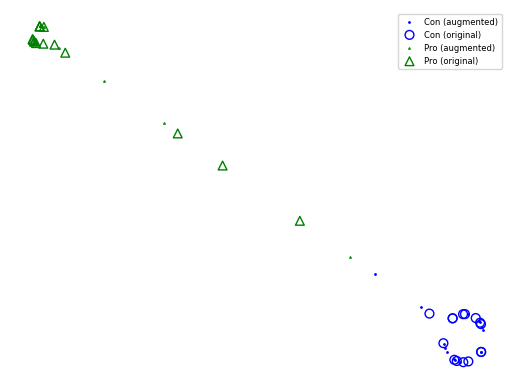

<Figure size 6400x4800 with 0 Axes>

In [40]:
tsne_plot('pc','aeda')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                1300      
                                                                 
 dense_5 (Dense)             (None, 2)                

6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fd389016670> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 [==============================] - 1s 5ms/step


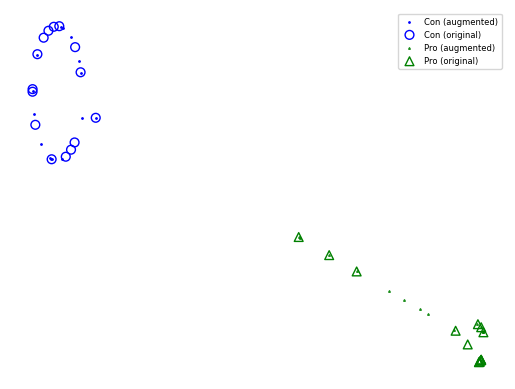

<Figure size 6400x4800 with 0 Axes>

In [41]:
tsne_plot('pc','eda')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                1300      
                                                                 
 dense_5 (Dense)             (None, 2)                

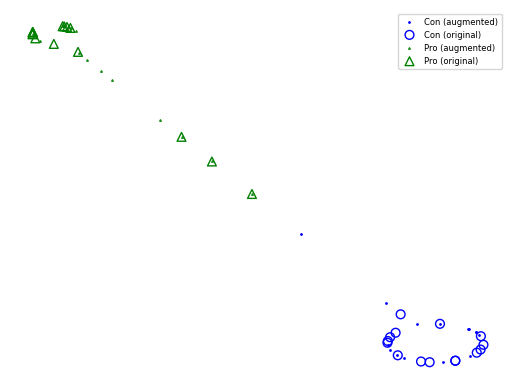

<Figure size 6400x4800 with 0 Axes>

In [42]:
tsne_plot('pc','wordnet')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                1300      
                                                                 
 dense_5 (Dense)             (None, 2)                

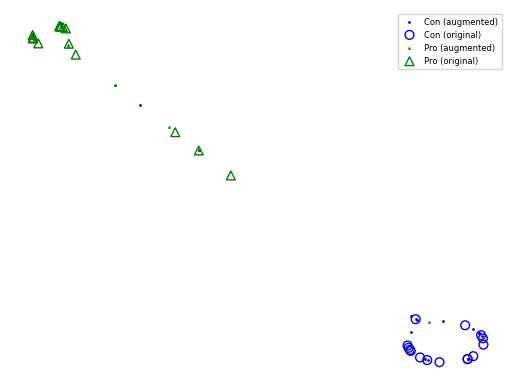

<Figure size 6400x4800 with 0 Axes>

In [43]:
tsne_plot('pc','backtranslation')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                1300      
                                                                 
 dense_7 (Dense)             (None, 2)                

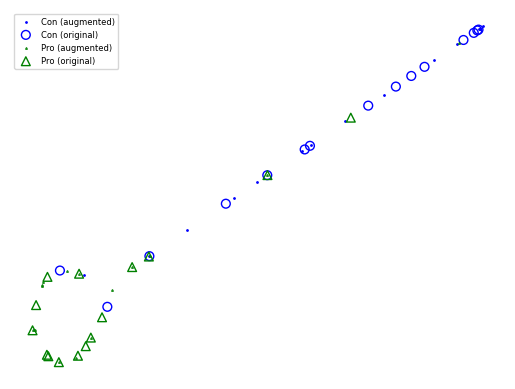

<Figure size 6400x4800 with 0 Axes>

In [44]:
tsne_plot('cr','eda')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                1300      
                                                                 
 dense_7 (Dense)             (None, 2)                

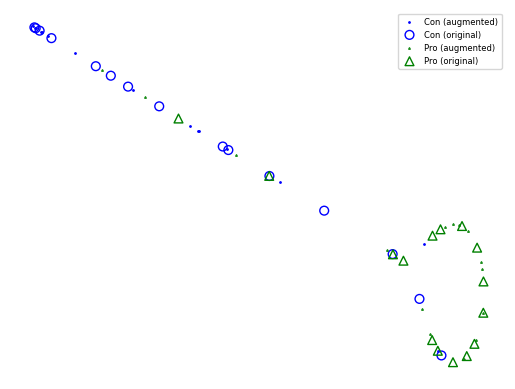

<Figure size 6400x4800 with 0 Axes>

In [46]:
tsne_plot('cr','aeda')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                1300      
                                                                 
 dense_7 (Dense)             (None, 2)                

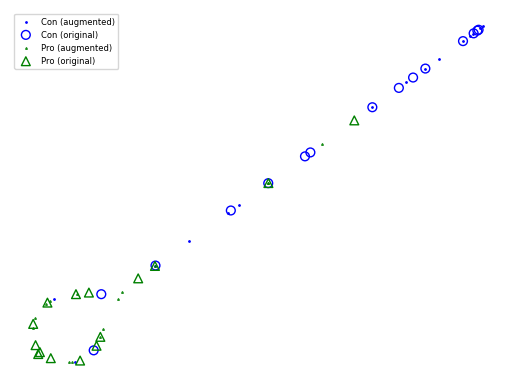

<Figure size 6400x4800 with 0 Axes>

In [47]:
tsne_plot('cr','wordnet')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                1300      
                                                                 
 dense_7 (Dense)             (None, 2)                

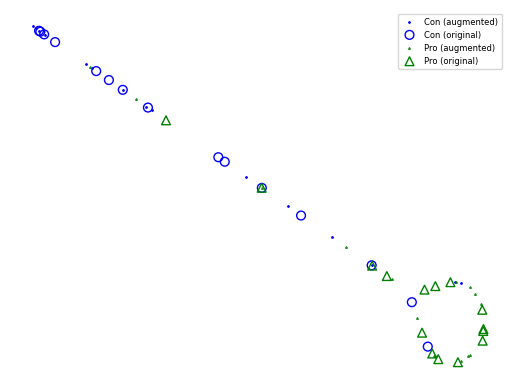

<Figure size 6400x4800 with 0 Axes>

In [48]:
tsne_plot('cr','backtranslation')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                1300      
                                                                 
 dense_9 (Dense)             (None, 2)                

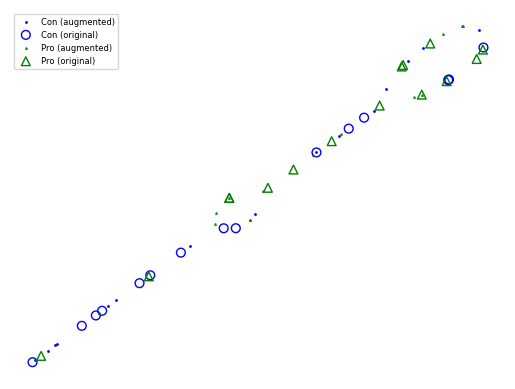

<Figure size 6400x4800 with 0 Axes>

In [49]:
tsne_plot('subj','eda')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                1300      
                                                                 
 dense_9 (Dense)             (None, 2)                

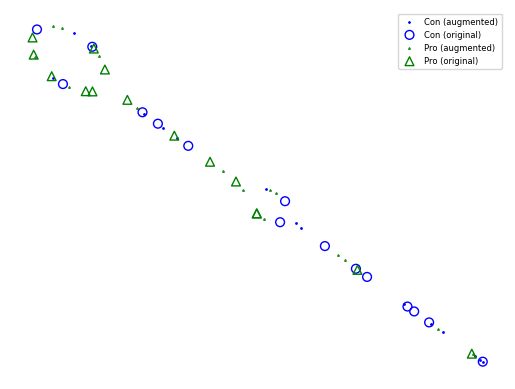

<Figure size 6400x4800 with 0 Axes>

In [50]:
tsne_plot('subj','aeda')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                1300      
                                                                 
 dense_9 (Dense)             (None, 2)                

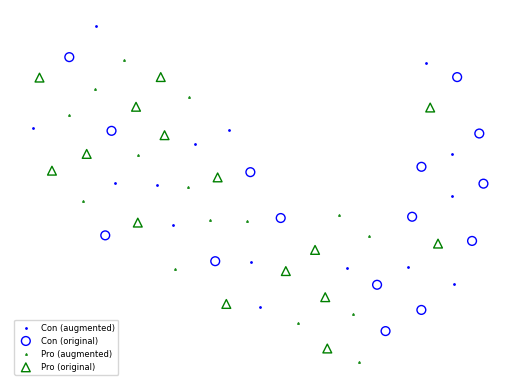

<Figure size 6400x4800 with 0 Axes>

In [51]:
tsne_plot('subj','wordnet')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 25, 128)          186880    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 25, 128)           0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                1300      
                                                                 
 dense_9 (Dense)             (None, 2)                

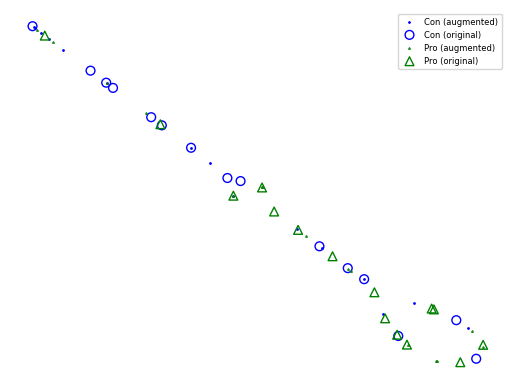

<Figure size 6400x4800 with 0 Axes>

In [52]:
tsne_plot('subj','backtranslation')